In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IADS Group Project/csv dumps/largeFinal-2024-12-07_002.csv')
df.head()

,Unnamed: 0,segmentid,ft_facilit,facilitycl,lanecount,number_total_crashes,number_bike_crashes,number_bikers_injured,number_bikers_killed,CurveFlag,StreetWidth_Min,StreetWidth_Max,Number_Travel_Lanes,Number_Park_Lanes,POSTED_SPEED,TRUCK_ROUTE_TYPE
0,2,10186,Sharrows,3,2,5,0,0.0,0.0,1,30.0,32.0,2,1,30,2
1,19,133998,Bike-Friendly Parking,3,1,10,1,2.0,0.0,1,44.0,44.0,3,1,25,2
2,20,133999,Bike-Friendly Parking,3,1,13,2,2.0,0.0,1,44.0,44.0,3,1,25,2
3,22,22919,Standard,2,1,25,5,5.0,0.0,1,46.0,46.0,2,2,25,2
4,23,21623,Standard,2,2,2,0,0.0,0.0,1,48.0,52.0,2,2,25,2


In [4]:
print(df.shape)
df.describe()

(3043, 16)


,Unnamed: 0,segmentid,facilitycl,lanecount,number_total_crashes,number_bike_crashes,number_bikers_injured,number_bikers_killed,CurveFlag,StreetWidth_Min,StreetWidth_Max,Number_Travel_Lanes,Number_Park_Lanes,POSTED_SPEED,TRUCK_ROUTE_TYPE
count,3043.000000,3.043000e+03,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.0,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000
mean,9511.962208,1.013811e+06,1.819586,1.625370,8.285573,1.215905,0.992770,0.006244,1.0,50.064739,51.725271,2.613868,1.720013,25.520868,2.115675
std,6649.282201,2.678668e+06,0.768793,0.523266,9.131461,1.979609,1.655171,0.078784,0.0,13.406484,13.255125,1.059272,0.449066,2.213121,0.332979
min,2.000000,6.200000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,15.000000,20.000000,1.000000,1.000000,20.000000,1.000000
25%,3768.500000,3.724500e+04,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.0,40.000000,40.000000,2.000000,1.000000,25.000000,2.000000
50%,8148.000000,1.091570e+05,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1.0,50.000000,50.000000,2.000000,2.000000,25.000000,2.000000
75%,13856.500000,2.157490e+05,2.000000,2.000000,12.000000,2.000000,1.000000,0.000000,1.0,60.000000,60.000000,4.000000,2.000000,25.000000,2.000000
max,22948.000000,9.017076e+06,4.000000,3.000000,68.000000,18.000000,14.000000,1.000000,1.0,104.000000,108.000000,6.000000,2.000000,40.000000,3.000000


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'segmentid', 'ft_facilit', 'facilitycl', 'lanecount',
       'number_total_crashes', 'number_bike_crashes', 'number_bikers_injured',
       'number_bikers_killed', 'CurveFlag', 'StreetWidth_Min',
       'StreetWidth_Max', 'Number_Travel_Lanes', 'Number_Park_Lanes',
       'POSTED_SPEED', 'TRUCK_ROUTE_TYPE'],
      dtype='object')


In [6]:
df = df[df['ft_facilit'] != '<Null>']

<ipython-input-7-88355688fa30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ft_facilit', data=df, palette='Set2')


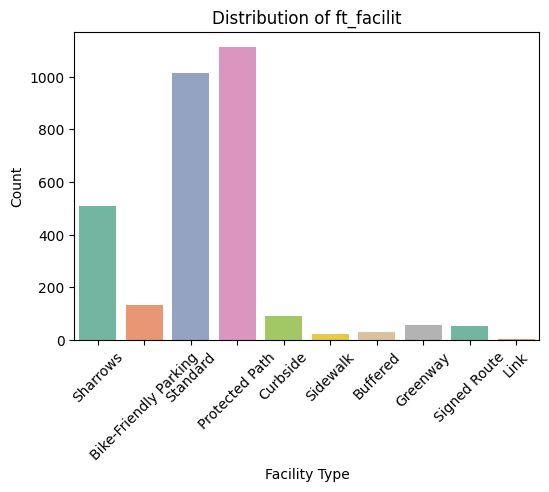

In [7]:
# plotting the map
plt.figure(figsize=(6, 4))
sns.countplot(x='ft_facilit', data=df, palette='Set2')
plt.title('Distribution of ft_facilit')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.shape

(3025, 16)

### Step 1: Establishing the simplest scaling relationship $Y\sim C X^q$ between the number of crashes vs. bike lanes features
Pay attention that 'facilitycl' is a categorical variable, we should take it as a discrete variable.

In [9]:
df.columns

Index(['Unnamed: 0', 'segmentid', 'ft_facilit', 'facilitycl', 'lanecount',
       'number_total_crashes', 'number_bike_crashes', 'number_bikers_injured',
       'number_bikers_killed', 'CurveFlag', 'StreetWidth_Min',
       'StreetWidth_Max', 'Number_Travel_Lanes', 'Number_Park_Lanes',
       'POSTED_SPEED', 'TRUCK_ROUTE_TYPE'],
      dtype='object')

In [10]:
# executing OLS regression, printing the report
model = smf.ols('number_bike_crashes ~ C(ft_facilit)', data=df).fit() # using C() on discrete variables
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     number_bike_crashes   R-squared:                       0.054
Model:                             OLS   Adj. R-squared:                  0.051
Method:                  Least Squares   F-statistic:                     19.03
Date:                 Tue, 10 Dec 2024   Prob (F-statistic):           2.95e-31
Time:                         23:26:39   Log-Likelihood:                -6281.2
No. Observations:                 3025   AIC:                         1.258e+04
Df Residuals:                     3015   BIC:                         1.264e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


<ipython-input-11-ab61b19e9bb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ft_facilit', y='number_bike_crashes', data=df, palette="Set3")


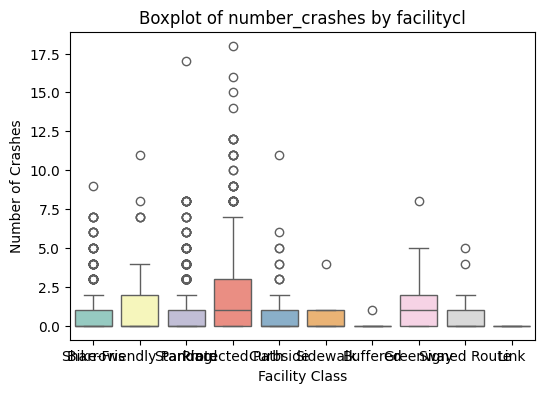

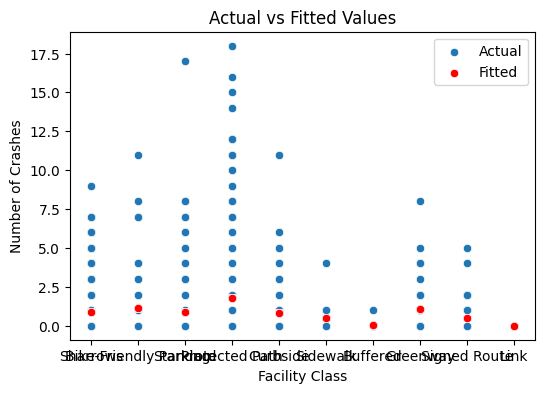

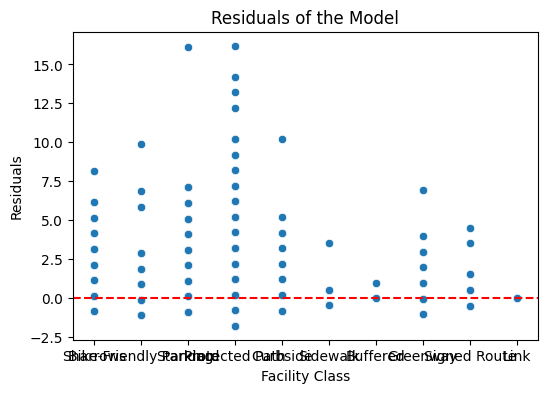

In [11]:
# visualizing the results
# 1. boxplot - displaying the distribution of every category
plt.figure(figsize=(6, 4))

# sns.boxplot(x='facilitycl', y='number_crashes', data=df, palette="Set3")
sns.boxplot(x='ft_facilit', y='number_bike_crashes', data=df, palette="Set3")
plt.title('Boxplot of number_crashes by facilitycl')
plt.xlabel('Facility Class')
plt.ylabel('Number of Crashes')
plt.show()

# 2. scatter plot of regression fitted values and actual values
df['fitted_values'] = model.fittedvalues
plt.figure(figsize=(6, 4))

# sns.scatterplot(x='facilitycl', y='number_crashes', data=df, label='Actual')
# sns.scatterplot(x='facilitycl', y='fitted_values', data=df, label='Fitted', color='red')
sns.scatterplot(x='ft_facilit', y='number_bike_crashes', data=df, label='Actual')
sns.scatterplot(x='ft_facilit', y='fitted_values', data=df, label='Fitted', color='red')
plt.title('Actual vs Fitted Values')
plt.xlabel('Facility Class')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# 3. plotting of residuals
df['residuals'] = model.resid
plt.figure(figsize=(6, 4))

# sns.scatterplot(x='facilitycl', y='residuals', data=df)
sns.scatterplot(x='ft_facilit', y='residuals', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the Model')
plt.xlabel('Facility Class')
plt.ylabel('Residuals')
plt.show()

### Step 2: Use regularization regression (Lasso or Ridge) to automatically filter important variables

In [12]:
# independent and dependent variables
# X = df[['Snow_Priority', 'facilitycl', 'CurveFlag', 'StreetWidth_Min', 'StreetWidth_Max', 'Number_Travel_Lanes', 'Number_Park_Lanes', 'POSTED_SPEED', 'TRUCK_ROUTE_TYPE']]
# y = df['number_crashes']
X = df[['ft_facilit', 'CurveFlag', 'StreetWidth_Min', 'StreetWidth_Max', 'Number_Travel_Lanes', 'Number_Park_Lanes', 'POSTED_SPEED', 'TRUCK_ROUTE_TYPE']]
y = df['number_bike_crashes']

# df['facilitycl'] = df['facilitycl'].astype('category')
df['ft_facilit'] = df['ft_facilit'].astype('category')
df['POSTED_SPEED'] = df['POSTED_SPEED'].astype('category')
df['TRUCK_ROUTE_TYPE'] = df['TRUCK_ROUTE_TYPE'].astype('category')

# converting categorical variables into dummy variables（one-hot encoding）
X = pd.get_dummies(X, drop_first=True)
print(X.head())

   CurveFlag  StreetWidth_Min  StreetWidth_Max  Number_Travel_Lanes  \
0          1             30.0             32.0                    2   
1          1             44.0             44.0                    3   
2          1             44.0             44.0                    3   
3          1             46.0             46.0                    2   
4          1             48.0             52.0                    2   

   Number_Park_Lanes  POSTED_SPEED  TRUCK_ROUTE_TYPE  ft_facilit_Buffered  \
0                  1            30                 2                False   
1                  1            25                 2                False   
2                  1            25                 2                False   
3                  2            25                 2                False   
4                  2            25                 2                False   

   ft_facilit_Curbside  ft_facilit_Greenway  ft_facilit_Link  \
0                False                False   

In [13]:
# transfering 'facilitycl' into a categorical variable
# df['facilitycl'] = df['facilitycl'].astype('category')
# print(df['facilitycl'].cat.categories)
df['ft_facilit'] = df['ft_facilit'].astype('category')
print(df['ft_facilit'].cat.categories)

# making new X
X = pd.get_dummies(df[['ft_facilit', 'CurveFlag', 'StreetWidth_Min',
                       'StreetWidth_Max', 'Number_Travel_Lanes', 'Number_Park_Lanes',
                       'POSTED_SPEED', 'TRUCK_ROUTE_TYPE']], drop_first=True)

# tesfitying it
print(X.head())

Index(['Bike-Friendly Parking', 'Buffered', 'Curbside', 'Greenway', 'Link',
       'Protected Path', 'Sharrows', 'Sidewalk', 'Signed Route', 'Standard'],
      dtype='object')
   CurveFlag  StreetWidth_Min  StreetWidth_Max  Number_Travel_Lanes  \
0          1             30.0             32.0                    2   
1          1             44.0             44.0                    3   
2          1             44.0             44.0                    3   
3          1             46.0             46.0                    2   
4          1             48.0             52.0                    2   

   Number_Park_Lanes  ft_facilit_Buffered  ft_facilit_Curbside  \
0                  1                False                False   
1                  1                False                False   
2                  1                False                False   
3                  2                False                False   
4                  2                False                False   



In [14]:
# splitting this given dataset into training set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# doing Lasso regression
# training the Lasso model（we'll adjust the value of alpha in the next block)
lasso = Lasso(alpha=0.0001)  # the larger the alpha, the stronger the regularization effect
lasso.fit(X_train_scaled, y_train)

# evaluating the model
y_pred = lasso.predict(X_test_scaled)
print("Lasso Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# outputing the coefficients
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients:")
print(lasso_coef[lasso_coef != 0])  # displaying the important variables

Lasso Regression
Mean Squared Error: 3.5018306106079238
R^2 Score: 0.09330307426434337
Lasso Coefficients:
StreetWidth_Min             -0.058657
StreetWidth_Max              0.219983
Number_Travel_Lanes          0.115851
Number_Park_Lanes            0.053826
ft_facilit_Buffered         -0.085427
ft_facilit_Curbside         -0.049989
ft_facilit_Greenway          0.037130
ft_facilit_Link             -0.041594
ft_facilit_Protected Path    0.325345
ft_facilit_Sharrows         -0.084669
ft_facilit_Sidewalk         -0.024085
ft_facilit_Signed Route     -0.055855
ft_facilit_Standard         -0.102230
POSTED_SPEED_25             -0.034943
POSTED_SPEED_30             -0.135054
POSTED_SPEED_40             -0.152324
TRUCK_ROUTE_TYPE_2           0.218571
TRUCK_ROUTE_TYPE_3           0.081568
dtype: float64


In [16]:
# finding the optimal alpha in Lasso
lasso = LassoCV(alphas=np.linspace(0.0001, 1, 200), cv=5)
lasso.fit(X_train, y_train)
best_alpha = lasso.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 0.0001


In [17]:
# doing Ridge regression
# training the Ridge model
ridge = Ridge(alpha=3.45)
ridge.fit(X_train, y_train)

# predicting and evaluating
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Ridge Regression Mean Squared Error: {mse}")
print(f"Ridge Regression R^2 Score: {r2}")
print("Ridge Coefficients:")
coefficients = pd.Series(ridge.coef_, index=X.columns)
print(coefficients)

Ridge Regression Mean Squared Error: 3.498937332151738
Ridge Regression R^2 Score: 0.0940522043546379
Ridge Coefficients:
CurveFlag                    0.000000
StreetWidth_Min             -0.004444
StreetWidth_Max              0.016859
Number_Travel_Lanes          0.107928
Number_Park_Lanes            0.116144
ft_facilit_Buffered         -0.767418
ft_facilit_Curbside         -0.249737
ft_facilit_Greenway          0.294127
ft_facilit_Link             -0.527952
ft_facilit_Protected Path    0.716106
ft_facilit_Sharrows         -0.180497
ft_facilit_Sidewalk         -0.200237
ft_facilit_Signed Route     -0.363826
ft_facilit_Standard         -0.173246
POSTED_SPEED_25              0.331543
POSTED_SPEED_30             -0.119273
POSTED_SPEED_40             -0.660686
TRUCK_ROUTE_TYPE_2           0.493789
TRUCK_ROUTE_TYPE_3           0.084832
dtype: float64


In [18]:
# finding the optimal alpha in Ridge
alphas = np.linspace(1, 100, 1000)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train, y_train)
print(f"Best alpha: {ridge_model.alpha_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha: 3.4774774774774775
